# Exercise: Pipeline

In this exercise, we aim to train a pipeline along with parameter tuning and perform prediction with the best model. More specifically we accomplish the following tasks: 

1. Develop a pipeline with feature extraction and linear regression models  
2. Perform grid search with the pipeline for optimizing some hyper-parameters
3. Evaluate the best model's performance
4. Identify the second best model 


The dataset we will be using for the dataset is face dataset.

## Face Data

(from SciKit Learn Docs)

This dataset is a collection of JPEG pictures of famous people collected over the internet, 
all details are available on the official website:

  *  http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. 
The typical task is called Face Verification: 
given a pair of two pictures, 
a binary classifier must predict whether the two images are from the same person.

An alternative task, 
Face Recognition or Face Identification is: 
given the picture of the face of an unknown person, 
identify the name of the person by referring to a gallery of previously seen pictures of identified persons.

Both Face Verification and Face Recognition are tasks that are typically 
performed on the output of a model trained to perform Face Detection. 
The most popular model for Face Detection is called Viola-Jones and is 
implemented in the OpenCV library. 
The LFW faces were extracted by this face detector from various online websites.

---

# Import libs

In [1]:
# Import all the libs you need:

from time import time
import matplotlib.pyplot as plt
import pandas as pd

## Load necessary libraries

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import fetch_lfw_people
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Load the Dataset
Load the dataset from sklearn datasets using `fetch_lfw_people`. Print the number of samples, features, and  classes.

In [2]:
# load the dataset:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


# Visualize Some Sample Images
Randomly sample 9 images from the dataset and visualize them in a 3X3 grid with their labels. 

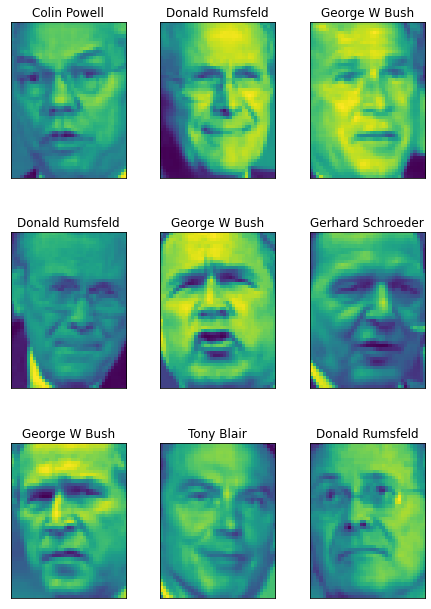

In [3]:
# visualize using matplot lib

from matplotlib import pyplot

row = 3
col = 3
total_sample = len(lfw_people.data)

pyplot.subplots_adjust(bottom=0, left=.01, right=.99, top=2, hspace=.35)


for i in range(row*col):
    pyplot.subplot(row, col, i+1)
    random_index = np.random.randint(0, total_sample)
    single_label = np.copy(lfw_people.data[random_index, :])
    single_label = single_label.reshape((h,w))
    pyplot.title(target_names[lfw_people.target[random_index]], size=12)
    pyplot.xticks(())
    pyplot.yticks(())
    pyplot.imshow(single_label)

# Split the dataset
Split the dataset into train (75%) and test (25%).

In [4]:
# split the dataset (E001)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)

# Build a Pipeline

Now we build a pipeline that performs feature extraction with PCA followed by classification using logistic regression. While developing the pipeline, we perform the following tasks. 

1. For PCA vary the `n_components` parameter and for logistic regression vary the regularization parameter `C`. Use at least 5 different values for each of these parameters. 
2. Use 10-fold cross validation while using the gridsearch


Note: If LogisticRegression doesn't converge increase the value for `max_iter`. 

## Define the pipeline


In [5]:
# Define the pipeline (E002)

LR = LogisticRegression(max_iter=10000, tol=0.1)

pipe = Pipeline([
    ('scale', MinMaxScaler()), 
    ('PCA', PCA), 
    ('LR', LR)
])

## Configure the Parameters for Grid Search

In [6]:
# Configure the parameters for grid search (E003)

tuned_parameters = {'C': [0.01, 0.1, 1, 10, 100]}

param_grid = {'pca__n_components': [5, 15, 30, 45, 70],
              'LR__C': [1e3, 5e3],        
              'LR__kernel': ['rbf']}
clf = GridSearchCV(LR, tuned_parameters, cv=5, n_jobs=2)

## Train the Pipeline with Grid Search

In [7]:
# Train the Pipeline with Grid Search (E004)


clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000, tol=0.1),
             n_jobs=2, param_grid={'C': [0.01, 0.1, 1, 10, 100]})

Once the pipline is fitted, we can address the following tasks. 

In [8]:
# Show the parameters of the trained models and their rankings in a table (E005)

df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.636800,0.407294,0.002361,0.000633,0.01,{'C': 0.01},0.824742,0.844560,0.839378,0.849741,0.818653,0.835415,0.011827,1
1,4.613064,0.163528,0.001963,0.000237,0.1,{'C': 0.1},0.824742,0.823834,0.844560,0.834197,0.823834,0.830233,0.008161,2
2,2.427860,0.136048,0.002028,0.000356,1,{'C': 1},0.809278,0.839378,0.818653,0.823834,0.803109,0.818850,0.012535,3
3,1.575962,0.105802,0.001698,0.000042,10,{'C': 10},0.804124,0.829016,0.818653,0.782383,0.797927,0.806421,0.016219,4
4,1.225601,0.193287,0.001789,0.000052,100,{'C': 100},0.814433,0.803109,0.813472,0.797927,0.792746,0.804337,0.008512,5


## Show the parameters of the best model

In [9]:
# Show the best model's parameters (E006)

df_best_model = df[df["rank_test_score"] == 1] 
df_best_model

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.6368,0.407294,0.002361,0.000633,0.01,{'C': 0.01},0.824742,0.84456,0.839378,0.849741,0.818653,0.835415,0.011827,1


## Show the parameters of the second best model

In [10]:
# Show the parameters of the second best model (E007)
df_second_best_model = df[df["rank_test_score"] == 2] 
df_second_best_model

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,4.613064,0.163528,0.001963,0.000237,0.1,{'C': 0.1},0.824742,0.823834,0.84456,0.834197,0.823834,0.830233,0.008161,2


## Show the mean and stddev of the test scores (i.e CV scores) for the second best model

In [13]:
# Show the mean and stddev of the test scores (i.e CV scores) for the second best model (E008)

print(df_second_best_model['mean_test_score'])
print(df_second_best_model['std_test_score'])

1    0.830233
Name: mean_test_score, dtype: float64
1    0.008161
Name: std_test_score, dtype: float64


## Evaluate the best model using the test data

Perform the following tasks: 

1. Make prediction
1. Show confusion matrix
1. Show classification task

In [14]:
# Make prediction (E009)

y_pred = clf.predict(X_test)

In [15]:
# Show confusion matrix (E010)

pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1,2,3,4,5,6
0,15,1,2,3,0,0,0
1,2,40,1,4,0,1,2
2,1,2,28,6,0,0,1
3,0,4,2,125,1,0,0
4,0,0,1,1,20,1,3
5,0,0,0,1,1,17,1
6,0,2,0,3,0,0,30


In [16]:
# Show the classification report (E011)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        21
           1       0.82      0.80      0.81        50
           2       0.82      0.74      0.78        38
           3       0.87      0.95      0.91       132
           4       0.91      0.77      0.83        26
           5       0.89      0.85      0.87        20
           6       0.81      0.86      0.83        35

    accuracy                           0.85       322
   macro avg       0.85      0.81      0.83       322
weighted avg       0.85      0.85      0.85       322



# Save your Notebook, then `File > Close and Halt`